In [50]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

Retrieving and cleaning data on the first dataset.

In [101]:
#First Dataframe ##########################
url_1 = "http://www.jmulti.de/download/datasets/e2.dat"
df_1  = pd.read_csv(url_1).iloc[:,:1]
df_1 = df_1.iloc[:,0].str.split()[7:]
df_fix = pd.DataFrame(columns = ["US Fixed Investment (1947-1974)", "Quaterly Changes"])
df_fix["US Fixed Investment (1947-1974)"] = [float(element[0]) for element in df_1]
df_fix["Quaterly Changes"] = [float(element[1]) for element in df_1]
#Second Dataframe ##########################
url_2 = "http://www.jmulti.de/download/datasets/e3.dat"
df_2  = pd.read_csv(url_1).iloc[:,:1]
df_2 = df_2.iloc[:,0].str.split()[8:]
df_yield = pd.DataFrame()
df_yield["Quaterly German Nominal GDP"] = [float(element[0]) for element in df_2]
#Third Dataframe ##########################
url_3 = "http://www.jmulti.de/download/datasets/NP_xetradax_returns100.dat"
df_3  = pd.read_csv(url_3, on_bad_lines='skip').iloc[:,:1]
df_3 = df_3.iloc[:,0].str.split()[7:]
df_stock = pd.DataFrame()
df_stock["DAX Daily Returns"] = [float(element[0]) for element in df_3]

### Observations

This dataset appears to fluctuate randomly <b>around a constant mean</b> with an <b>homogeneous variability</b>. 

Correlation between consecutive variables seem possible.

<i>Aqui observamos una serie temporal que fluctua alrededor de una media fija, esta fluctuacion es de caracter aleatorio, pero la varianza alrededor de esta media en cuestion no parece ser muy aleatoria, sino homogenea </i>

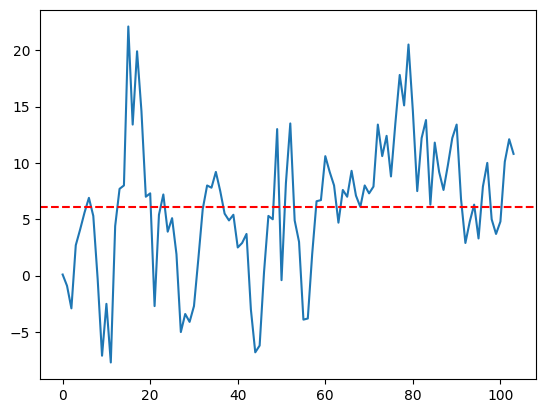

In [102]:
df_fix["Quaterly Changes"].plot()
plt.axhline(y = df_fix["Quaterly Changes"].mean(), color = "r", linestyle = "dashed")

### Observations

This dataset appears to evolve <b>around a deterministic polynomial trend</b> with a <b>seasonal movement</b>. <br>

<i>Aqui estamos viendo una tendencia al alza determinista (es decir la tendencia de esta serie temporal es de caracter no aleatorio, es una tendencia solida que no depende del azar). </i>

<AxesSubplot:>

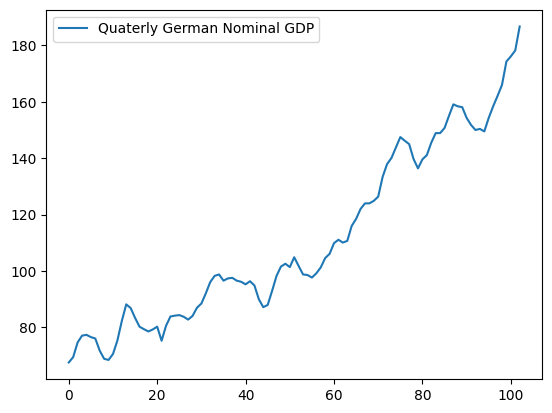

In [103]:
df_yield.plot()

### Observations

This dataset <b>moves around a fixed mean value</b> with <b>dissimilar variability</b>. <br>

<i>Vemos una serie que evoluciona de forma constante alrededor de una media fija. Sin embargo la variabilidad con la que se mueve alrededor de esta media no parece nada constante. </i>

<AxesSubplot:>

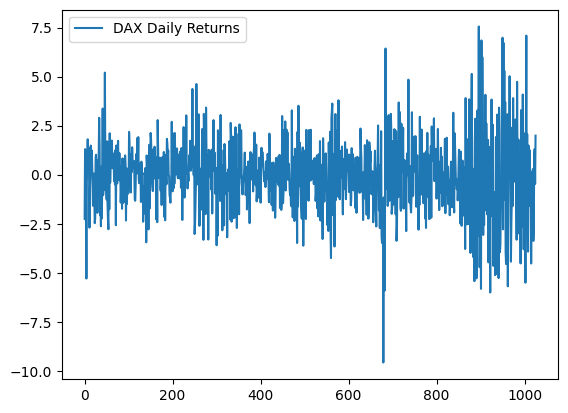

In [105]:
df_stock.plot()

### Stationarity

We will say that a stochastic process (set of random variables) is <b>stationary</b> if it has time-invariant first and second moments. In other words:<br>

 -  $\mathbb{E}[y_t] = \mu_y \text{ for all }t \in T$
 - $\mathbb{E}[(y_t - \mu_y)(y_{t-h} - \mu_y)] = \gamma_h \text{ for all }t \in T \text{ and all  integers } h \text{  such that } t-h \in T $

<i>Lo importante es que la covarianza que tenga la serie con respecto a si mismo con lag, no depende de $t$ sino unica y exclusivamente del tiempo que ha pasado entre las dos observaciones: $t - h$. Si escojemos $h = 0$ la varianza de la serie temporal es constante. </i><br>

The first time-serie we analyzed seems to be stationnary. The DAX serie doesn't seem stationary because variability not constant. 

### Autocorrelations and spectral densities

 - Sample Autocorrelation:  $\tilde{\rho_h} = \frac{\tilde{\gamma_h}}{\tilde{\gamma_0}}$
 - Sample Covariance: $\tilde{\gamma_h} = \frac{1}{T} \sum (y_t - \bar{y})(y_{t-h} - \bar{y})$
 - If all the autocorrelations are 0 for a 

For a stationary time series the autocorrelation die quickly as we increase $h$